In [1]:
#-----------------------------------------
# Title: Polynomial Regression With Abalone Dataset
# Subtitle: DDS-8555, Assignment 4, Part 2
# Author: Madgene Moise
# Date: Sunday, June 8, 2025
#-----------------------------------------

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence

In [3]:
# Load the training and testing datasets
train_df = pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")

# Display the first few rows of each dataset to understand structure
train_df.head(), test_df.head()

(   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
 0   0   F   0.550     0.430   0.150        0.7715          0.3285   
 1   1   F   0.630     0.490   0.145        1.1300          0.4580   
 2   2   I   0.160     0.110   0.025        0.0210          0.0055   
 3   3   M   0.595     0.475   0.150        0.9145          0.3755   
 4   4   I   0.555     0.425   0.130        0.7820          0.3695   
 
    Whole weight.2  Shell weight  Rings  
 0          0.1465        0.2400     11  
 1          0.2765        0.3200     11  
 2          0.0030        0.0050      6  
 3          0.2055        0.2500     10  
 4          0.1600        0.1975      9  ,
       id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
 0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
 1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
 2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
 3  90618   M   0.570     0.490  

In [4]:
# Categorical: Sex (Male=M, Female=F, Infant=I)
# Numerical: Length, Diameter, Height, Whole weight, Whole weight.1, Whole weight.2, Shell weight.
# Target: Rings (This is the response variable we aim to predict)

# Clean the data
train_df.columns = train_df.columns.str.replace(r"[.\s]+", "_", regex=True)
test_df.columns = test_df.columns.str.replace(r"[.\s]+", "_", regex=True)


In [5]:
# Polynomial regression formula (degree 2) for each numeric predictor + factor for Sex
poly_formula = (
    "Rings ~ np.power(Length, 2) + Length + "
    "np.power(Diameter, 2) + Diameter + "
    "np.power(Height, 2) + Height + "
    "np.power(Whole_weight, 2) + Whole_weight + "
    "np.power(Whole_weight_1, 2) + Whole_weight_1 + "
    "np.power(Whole_weight_2, 2) + Whole_weight_2 + "
    "np.power(Shell_weight, 2) + Shell_weight + "
    "C(Sex)"
)

In [6]:
# Create design matrices
y_train, X_train = patsy.dmatrices(poly_formula, data=train_df, return_type='dataframe')

# Fit the polynomial regression model
poly_model = sm.OLS(y_train, X_train).fit()

# Output model summary
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     9641.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:30:17   Log-Likelihood:            -1.8825e+05
No. Observations:               90615   AIC:                         3.765e+05
Df Residuals:                   90598   BIC:                         3.767e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6493      0.111     14.900      0.000       1.432       1.866
C(Sex)[T.I]                    -0.4719      0.022    -21.900      0.000      -0.514      -0.430
C(Sex)[T.M]                    -0.0177      0.016     -1.087      0.277      -0.050       0.014
np.power(Length, 2)           -24.7689      1.531    -16.177      0.000     -27.770     -21.768
Length                         16.4315      1.681      9.776      0.000      13.137      19.726
np.power(Diameter, 2)          -0.4658      2.323     -0.201      0.841      -5.019       4.087
Diameter                       -1.5516      2.019     -0.769      0.442      -5.509       2.406
np.power(Height, 2)           -16.4986      1.355    -12.174      0.000     -19.155     -13.842
Height                         19.9274      0.810     24.612      0.000      18.340      21.514
np.power(Whole_weight, 2)      -3.1528      0.116    -27.196      0.000      -3.380      -2.926
Whole_weight                   13.5366      0.324     41.741      0.000      12.901      14.172
np.power(Whole_weight_1, 2)    14.4274      0.333     43.282      0.000      13.774      15.081
Whole_weight_1                -30.6195      0.401    -76.378      0.000     -31.405     -29.834
np.power(Whole_weight_2, 2)     1.6004      1.487      1.076      0.282      -1.314       4.515
Whole_weight_2                 -6.8754      0.836     -8.222      0.000      -8.514      -5.236
np.power(Shell_weight, 2)     -11.3971      0.722    -15.792      0.000     -12.812      -9.983
Shell_weight                   31.0061      0.602     51.521      0.000      29.827      32.186
==============================================================================
Omnibus:                    30839.170   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180219.768
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                       9.202   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Polynomial Regression Model Summary (Degree 2)**

Model Fit
* R-squared: 0.630, which means the model explains 63.0% of the variance in Rings, slightly below the Regression Spline model (which was about 0.635).

* F-statistic: 9641, p < 0.001, which means the overall regression model is highly significant.

With regard to the interpretation of key coefficients, the categorical variable Sex showed that infants had about 0.47 fewer rings than the reference group (Females), p <0.001. There was no statistically significant difference between Males and Females (p = 0.277). 

Nonlinear Terms (Squared Variables) showed significant nonlinear effects for Length-squared, Height-squared, Whole_weight-squared, and Shell_weight-squared. There is a strong curvature, all p < 0.001. The non-significant or weak terms were observed for Diameter-squared and Whole_weight_2-squared (p > 0.28). For example, Whole_weight has a positive linear coefficient of 13.54. Whereas, Whole_weight had a negative quadratic coefficient of -3.15, which implies a peak in the relationship where ring counts increase with weight, but slows at higher values.

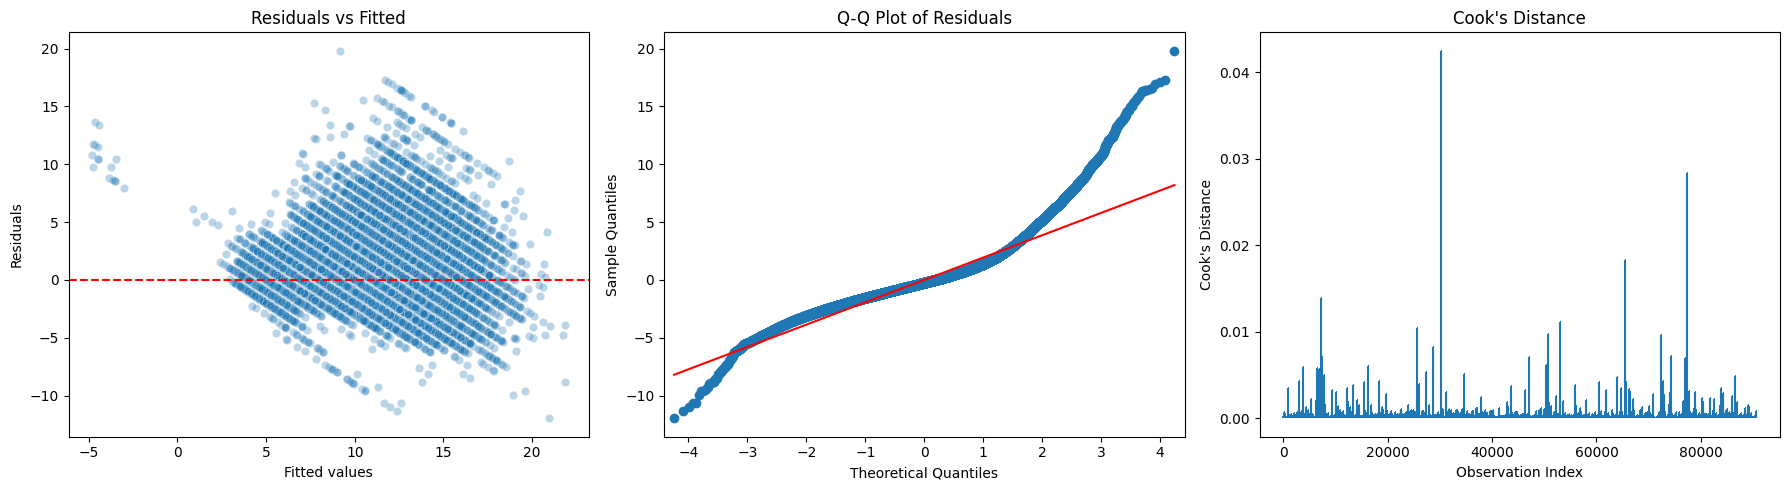

In [7]:
# Visualize residuals to validate the model.

# Residuals and fitted values from polynomial regression model
residuals = poly_model.resid
fitted = poly_model.fittedvalues

# Cook's Distance
influence = OLSInfluence(poly_model)
cooks_d = influence.cooks_distance[0]

# Plot diagnostics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Fitted
sns.scatterplot(x=fitted, y=residuals, ax=axes[0], alpha=0.3)
axes[0].axhline(0, linestyle='--', color='red')
axes[0].set_title('Residuals vs Fitted')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')

# 2. Q-Q Plot
qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# 3. Cook's Distance
axes[2].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
axes[2].set_title("Cook's Distance")
axes[2].set_xlabel("Observation Index")
axes[2].set_ylabel("Cook's Distance")

plt.tight_layout()
plt.show()


For the plot of Residuals vs. Fitted, most residuals are centered around zero. There is an increasing spread at higher fitted values, suggesting heteroscedasticity (non-constant variance). 

For the Quantile(Q)-Quantile(Q) plot, there is substantial deviation from the diagonal line in the tails, which indicates non-normality of residuals. Mild violations are expected in large samples (about 90 thousand rows), which is still worth noting.

For the Cook's Distance plot, there are a few high-leverage points that exist, but none dominate (values < 0.05). There are no severe influence issues. 

In [8]:
# Prepare test design matrix using the same RHS formula
poly_rhs = poly_formula.split("~")[1].strip()
X_test = patsy.dmatrix(poly_rhs, data=test_df, return_type='dataframe')

# Predict using the polynomial regression model
test_predictions = poly_model.predict(X_test)

# Clip negative predictions
test_predictions_clipped = test_predictions.clip(lower=0)

# Prepare and save submission DataFrame
submission_df_poly = pd.DataFrame({
    'id': test_df['id'],
    'Rings': test_predictions_clipped
})

submission_df_poly.head()

,id,Rings
0,90615,8.578800
1,90616,9.927976
2,90617,10.523429
3,90618,10.473040
4,90619,7.823352
